In [2]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier


In [4]:
df = pd.read_csv("/content/insurance_claims.csv")

In [5]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

### Dataset Column Descriptions

- **months_as_customer**: Number of months a customer has been with the company.
- **age**: Age of the insured individual.
- **policy_number**: Unique identifier for each policy.
- **policy_bind_date**: Date when the policy was bound or issued.
- **policy_state**: The state where the policy was issued (e.g., NY, CA).
- **policy_csl**: Combined single limit (e.g., 100/300).
- **policy_deductable**: The deductible amount for the policy.
- **policy_annual_premium**: Annual premium amount for the policy.
- **umbrella_limit**: Additional liability coverage above regular policy limits.
- **insured_zip**: ZIP code of the insured individual's residence.
- **insured_sex**: Gender of the insured individual.
- **insured_education_level**: Education level of the insured individual (e.g., High School, College).
- **insured_occupation**: Occupation of the insured individual.
- **insured_hobbies**: Hobbies of the insured individual.
- **insured_relationship**: Relationship status of the insured individual (e.g., single, married).
- **capital-gains**: Capital gains reported by the insured.
- **capital-loss**: Capital losses reported by the insured.
- **incident_date**: Date of the reported incident.
- **incident_type**: Type of incident (e.g., collision, theft).
- **collision_type**: Type of collision (e.g., rear-end, sideswipe).
- **incident_severity**: Severity level of the incident.
- **authorities_contacted**: Whether authorities were contacted after the incident.
- **incident_state**: State where the incident occurred.
- **incident_city**: City where the incident occurred.
- **incident_location**: Detailed location of the incident.
- **incident_hour_of_the_day**: Hour of the day when the incident occurred (0–23).
- **number_of_vehicles_involved**: Number of vehicles involved in the incident.
- **property_damage**: Indicates whether there was property damage.
- **bodily_injuries**: Number of bodily injuries reported in the incident.
- **witnesses**: Number of witnesses to the incident.
- **police_report_available**: Whether a police report is available.
- **total_claim_amount**: Total amount claimed for the incident.
- **injury_claim**: Amount claimed for injuries.
- **property_claim**: Amount claimed for property damage.
- **vehicle_claim**: Amount claimed for vehicle damage.
- **auto_make**: Make of the insured vehicle (e.g., Toyota, Honda).
- **auto_model**: Model of the insured vehicle (e.g., Corolla, Civic).
- **auto_year**: Manufacturing year of the insured vehicle.
- **fraud_reported**: Indicates whether the incident is suspected as fraud.
- **_c39**: A column with no data (likely redundant or an error).


In [7]:
## After observing the dataset we got to know that there are some feature that are not in relation with the target so lets drop it
# List of columns to drop
columns_to_drop = [
    'policy_number', 'insured_zip', 'policy_bind_date',
    'incident_location', 'auto_make', 'auto_model', '_c39',
    'insured_hobbies', 'insured_occupation', 'insured_relationship',
    'capital-gains', 'capital-loss'
]

# Drop the columns
df = df.drop(columns=columns_to_drop, axis=1)


In [8]:
df.isnull().sum()

,0
months_as_customer,0
age,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_sex,0
insured_education_level,0
incident_date,0


In [9]:
df['authorities_contacted']

,authorities_contacted
0,Police
1,Police
2,Police
3,Police
4,NaN
...,...
995,Fire
996,Fire
997,Police
998,Other


In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
# Reshape using ravel() to make it 1D
df['authorities_contacted'] = imputer.fit_transform(df[['authorities_contacted']]).ravel()


In [11]:
# Selecting numerical features to know outliers
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

In [12]:
numerical_features

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year'],
      dtype='object')

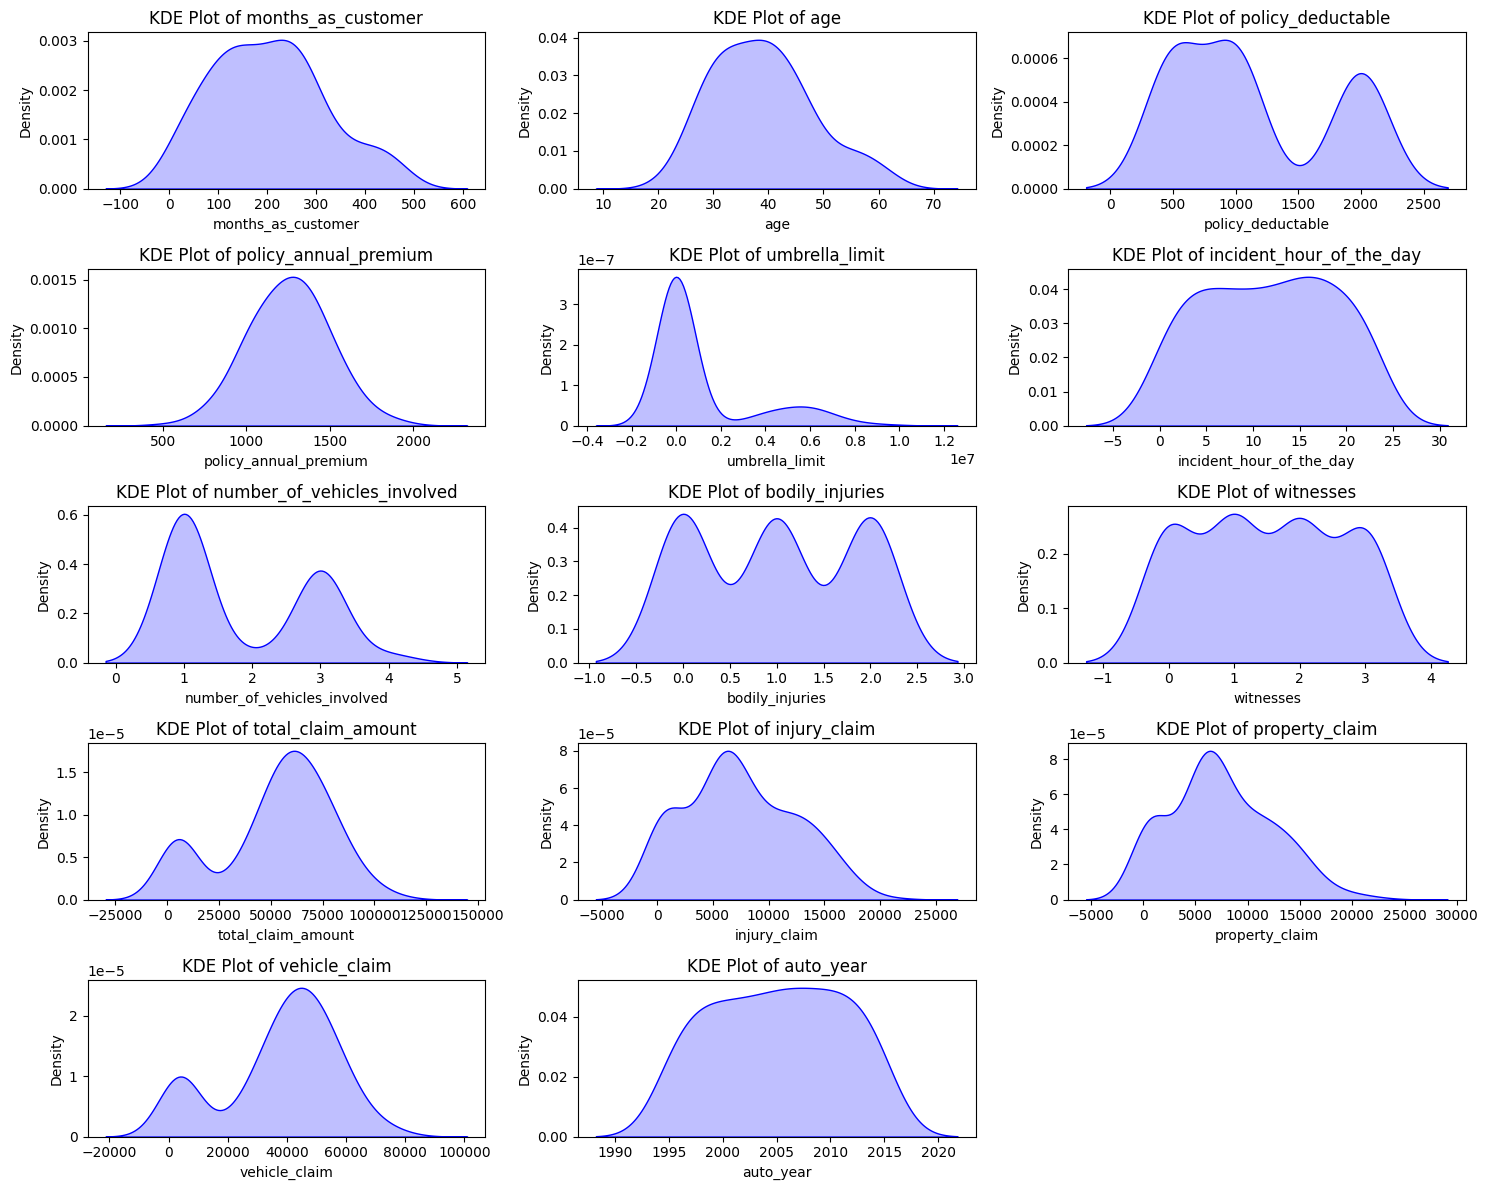

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure numerical_features is a DataFrame
numerical_features = df.select_dtypes(include=['int64', 'float64'])

# Plot KDE for each numerical feature
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_features.columns, 1):
    plt.subplot((len(numerical_features.columns) + 2) // 3, 3, i)  # Adjust the layout
    sns.kdeplot(data=numerical_features[col], fill=True, color="blue", bw_adjust=1.5)
    plt.title(f"KDE Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
plt.tight_layout()
plt.show()


In [14]:
numerical_features.skew()

,0
months_as_customer,0.362177
age,0.478988
policy_deductable,0.477887
policy_annual_premium,0.004402
umbrella_limit,1.806712
incident_hour_of_the_day,-0.035584
number_of_vehicles_involved,0.502664
bodily_injuries,0.014777
witnesses,0.019636
total_claim_amount,-0.594582


Skewness Interpretation

**Skewness** ≈ 0: The feature is approximately normally distributed.

**Skewness** > 0: The feature is positively skewed (tail on the right).

**Skewness** < 0: The feature is negatively skewed (tail on the left).

### Handling Skewed Features

- **For Positive Skew**:
  - Apply transformations to reduce the skewness and make the distribution closer to normal:
    - **Log Transformation**: Apply a `log(x + 1)` or `log1p(x)` to transform values.
    - **Square Root Transformation**: Use `sqrt(x)` to moderate the right tail.
    - **Box-Cox Transformation**: A more flexible transformation that can handle different types of skewness.
  
- **For Negative Skew**:
  - Use transformations that can help correct the left tail:
    - **Log Transformation**: Applying a `log(x + 1)` transformation can help with negative skew.
    - **Inverse Transformation**: Use `1 / (x + 1)` to reverse the skewness.

- **For Nearly Normal Features**:
  - **No Transformation Needed**: Features that are nearly normal (skewness close to 0) typically do not require transformation. These features can be used directly in modeling.
- **IQR Method**: Best for detecting outliers based on the middle 50% of the data, especially in skewed or non-normal distributions.
- **Percentile Method**: Useful for detecting specific extremes in the data, such as the top or bottom X% of values.

In [15]:
numerical_features_negative = ['total_claim_amount', 'vehicle_claim','incident_hour_of_the_day','total_claim_amount','vehicle_claim','auto_year']

In [16]:
numerical_features_negative = ['total_claim_amount', 'vehicle_claim','incident_hour_of_the_day','auto_year']  # Removed duplicate features

# Calculate the lower and upper percentiles (1st and 99th percentiles, for example)
lower_percentile = df[numerical_features_negative].quantile(0.01)
upper_percentile = df[numerical_features_negative].quantile(0.99)

# Apply clipping using the calculated percentiles
for feature in numerical_features_negative: # 'feature' is defined within this loop
    df[feature] = df[feature].clip(lower=lower_percentile[feature], upper=upper_percentile[feature]) # 'feature' is used correctly here

In [17]:
# Select categorical features excluding 'fraud_reported'
categorical_features = df.select_dtypes(include=['object', 'category']).columns
categorical_features = categorical_features[categorical_features != 'fraud_reported']


In [18]:
print("Categorical Features:", categorical_features)
df = pd.get_dummies(df, columns=categorical_features)

Categorical Features: Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available'],
      dtype='object')


In [19]:
df.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,...,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,property_damage_?,property_damage_NO,property_damage_YES,police_report_available_?,police_report_available_NO,police_report_available_YES
0,328,48,1000,1406.91,0,5,1,1,2,71610.0,...,False,False,False,False,False,False,True,False,False,True
1,228,42,2000,1197.22,5000000,8,1,0,0,5070.0,...,False,False,True,False,True,False,False,True,False,False
2,134,29,2000,1413.14,5000000,7,3,2,3,34650.0,...,False,False,False,False,False,True,False,False,True,False
3,256,41,2000,1415.74,6000000,5,1,1,2,63400.0,...,False,False,False,False,True,False,False,False,True,False
4,228,44,1000,1583.91,6000000,20,1,0,1,6500.0,...,False,False,False,False,False,True,False,False,True,False


In [20]:
df = df.applymap(lambda x: int(x) if isinstance(x, bool) else x)


In [21]:
from sklearn.model_selection import train_test_split
X = df.drop('fraud_reported', axis=1)
y = df['fraud_reported']

In [22]:
y = y.map({'N': 0, 'Y': 1})
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
import pickle
# Save feature names
with open('features.pkl', 'wb') as file:
    pickle.dump(X_train.columns, file)


In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Example scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier inspection
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Verify mean and standard deviation
print("Training Data - Mean:\n", X_train_scaled_df.mean())

print("Training Data - Std Dev:\n", X_train_scaled_df.std())

print("\nTest Data - Mean:\n", X_test_scaled_df.mean())
print("Test Data - Std Dev:\n", X_test_scaled_df.std())


Training Data - Mean:
 months_as_customer            -1.332268e-17
age                            7.549517e-17
policy_deductable             -1.998401e-17
policy_annual_premium          4.696243e-16
umbrella_limit                 0.000000e+00
                                   ...     
property_damage_NO            -1.332268e-17
property_damage_YES           -4.440892e-17
police_report_available_?      7.993606e-17
police_report_available_NO    -1.554312e-17
police_report_available_YES   -6.661338e-17
Length: 125, dtype: float64
Training Data - Std Dev:
 months_as_customer             1.000626
age                            1.000626
policy_deductable              1.000626
policy_annual_premium          1.000626
umbrella_limit                 1.000626
                                 ...   
property_damage_NO             1.000626
property_damage_YES            1.000626
police_report_available_?      1.000626
police_report_available_NO     1.000626
police_report_available_YES    1.000626

In [26]:
# Dictionary of models to train
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train each model and evaluate
results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_test, y_pred))
    print("-" * 50)
    results[model_name] = accuracy

# Print best model
best_model = max(results, key=results.get)
print(f"\nBest Model: {best_model} with Accuracy: {results[best_model]:.2f}")


Training Logistic Regression...
Logistic Regression Accuracy: 0.72
Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.72      1.00      0.84       145
           1       0.00      0.00      0.00        55

    accuracy                           0.72       200
   macro avg       0.36      0.50      0.42       200
weighted avg       0.53      0.72      0.61       200

--------------------------------------------------
Training Decision Tree...
Decision Tree Accuracy: 0.69
Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       145
           1       0.44      0.42      0.43        55

    accuracy                           0.69       200
   macro avg       0.61      0.61      0.61       200
weighted avg       0.69      0.69      0.69       200

--------------------------------------------------
Training Random Forest...
Random

#Model Performance visualization

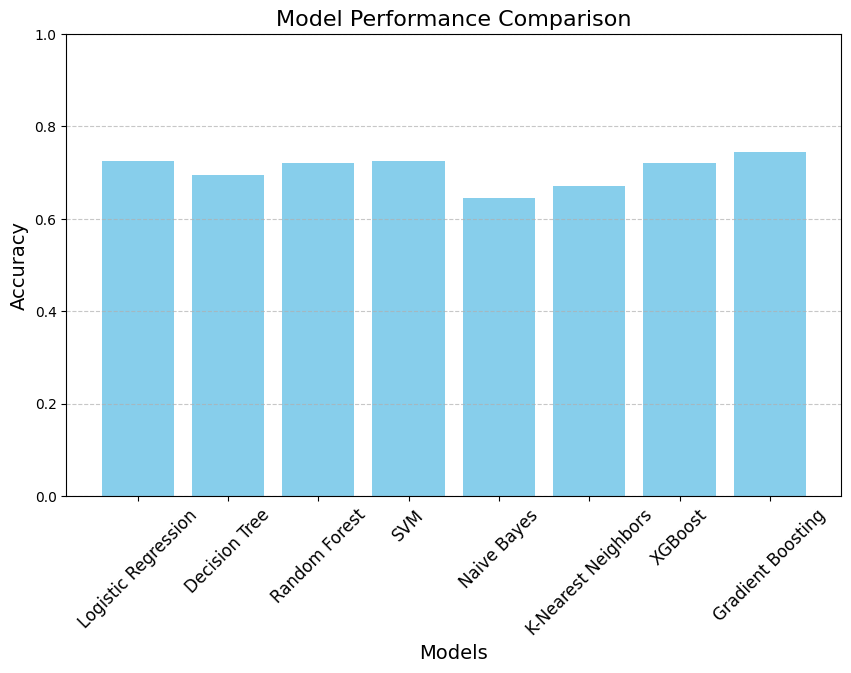

In [27]:
import matplotlib.pyplot as plt

# Visualize model accuracy
model_names = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.title('Model Performance Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.ylim(0, 1)  # Accuracy range (0 to 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Confusion Matrix for Logistic Regression:


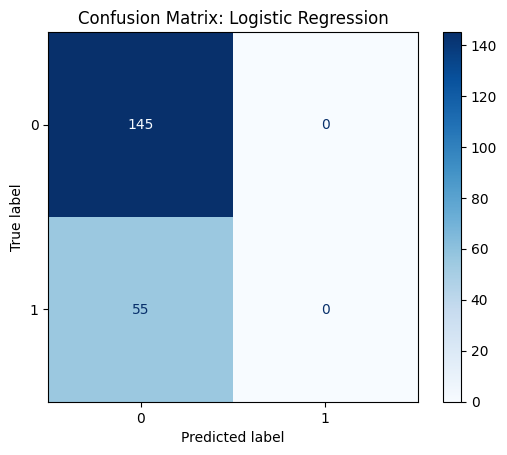

Confusion Matrix for Decision Tree:


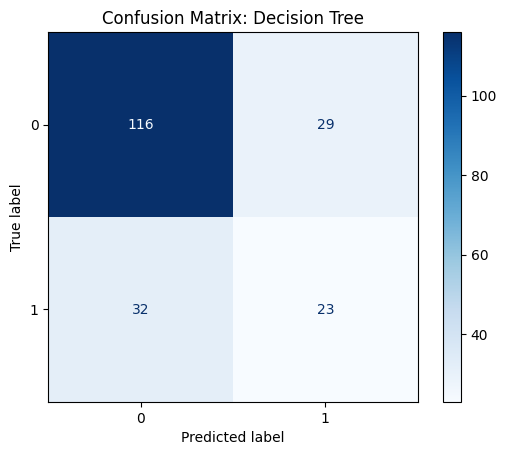

Confusion Matrix for Random Forest:


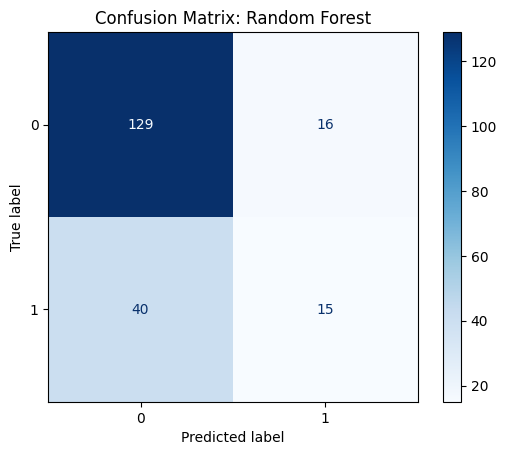

Confusion Matrix for SVM:


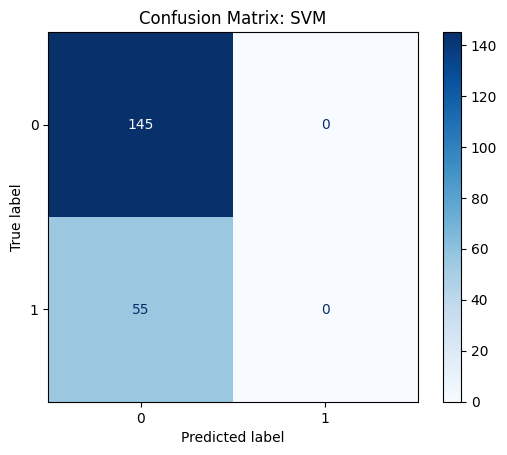

Confusion Matrix for Naive Bayes:


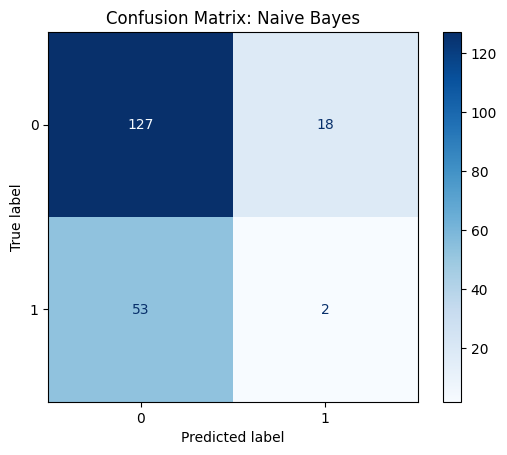

Confusion Matrix for K-Nearest Neighbors:


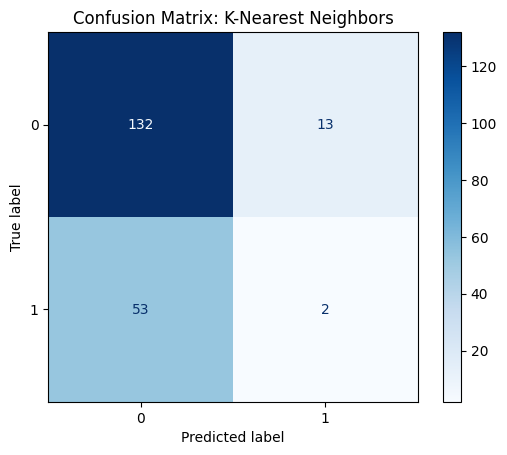

Confusion Matrix for XGBoost:


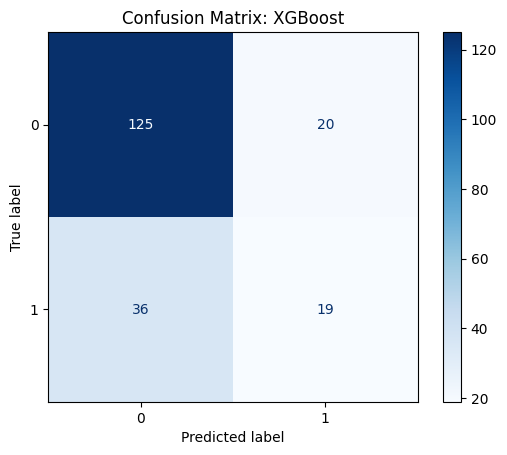

Confusion Matrix for Gradient Boosting:


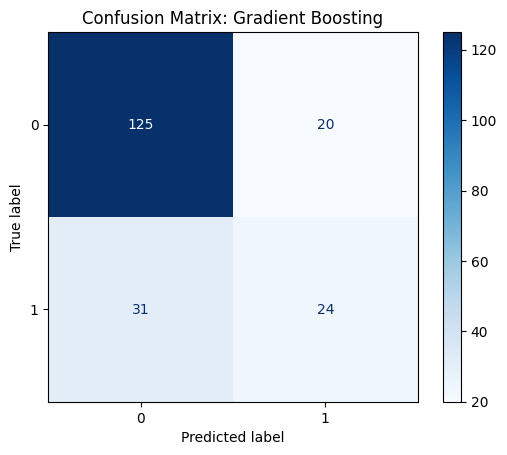

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot confusion matrix for each model
for model_name, model in models.items():
    print(f"Confusion Matrix for {model_name}:")
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.show()


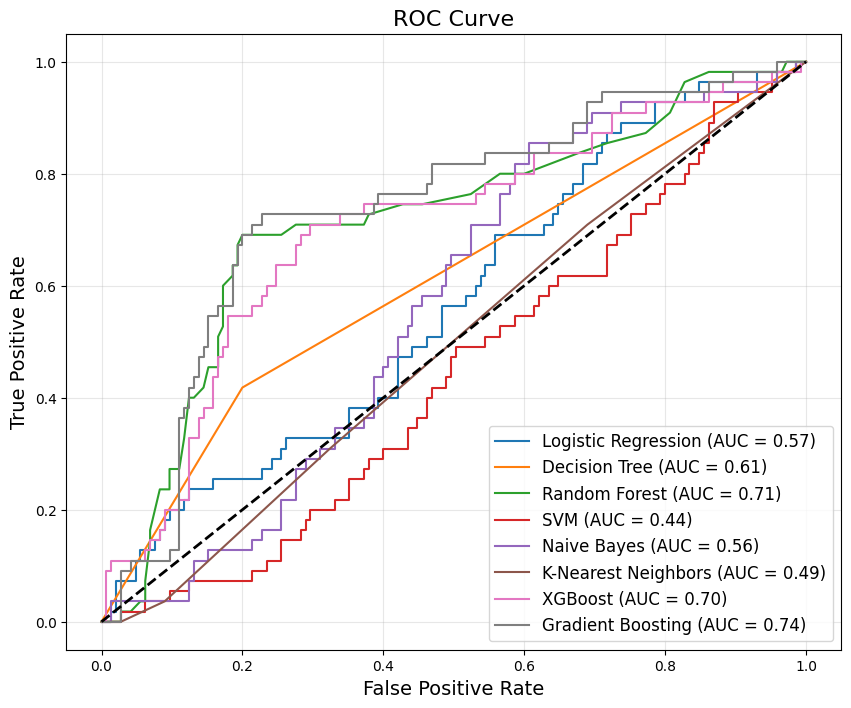

In [29]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))
for model_name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title("ROC Curve", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.3)
plt.show()


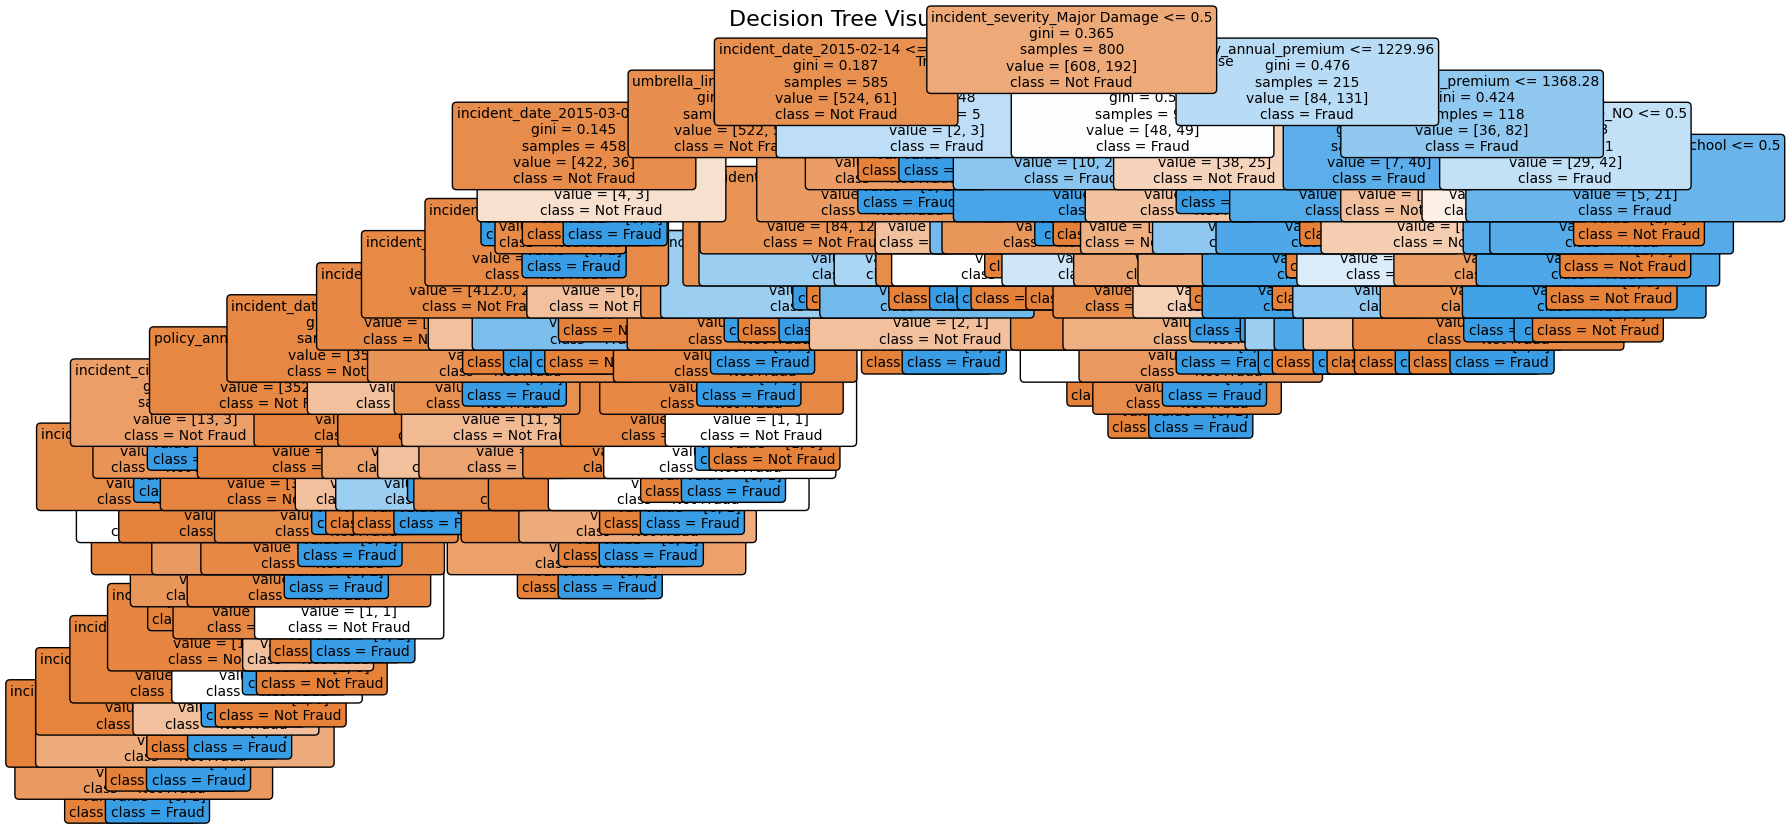

In [30]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Train or load your DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()  # Create an instance of the classifier
decision_tree.fit(X_train, y_train)      # Train the classifier using your training data

# Now you can visualize the trained Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    decision_tree,  # Now 'decision_tree' is defined
    feature_names=X.columns,
    class_names=["Not Fraud", "Fraud"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()

In [31]:
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier

# Assuming your model and scaler have been trained
scaler = StandardScaler()
model = GradientBoostingClassifier()

# Fit the scaler and model
scaler.fit(X_train)
model.fit(X_train, y_train)

# Save the scaler and model using pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)



In [33]:
import pandas as pd
import pickle

# New data for prediction (example)
data = {
    'months_as_customer': [5],
    'age': [30],
    'policy_state': ['TX'],
    'policy_csl': ['250/500'],
    'policy_deductable': [250],
    'policy_annual_premium': [2500.75],
    'umbrella_limit': [1000000],
    'insured_sex': ['MALE'],
    'insured_education_level': ['High School'],
    'incident_date': ['2024-12-15'],
    'incident_type': ['Multi-vehicle Collision'],
    'collision_type': ['Rear Collision'],
    'incident_severity': ['Major Damage'],
    'authorities_contacted': ['Police'],
    'incident_state': ['CA'],
    'incident_city': ['San Diego'],
    'incident_hour_of_the_day': [2],
    'number_of_vehicles_involved': [3],
    'property_damage': ['YES'],
    'bodily_injuries': [2],
    'witnesses': [3],
    'police_report_available': ['YES'],
    'total_claim_amount': [90000],
    'injury_claim': [15000],
    'property_claim': [30000],
    'vehicle_claim': [45000],
    'auto_year': [2022],
}

# Create a DataFrame for the new data
new_data = pd.DataFrame(data)

# Load the scaler, trained model, and feature names
with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)
with open('features.pkl', 'rb') as file:
    feature_names = pickle.load(file)

# Apply one-hot encoding to new data
categorical_features = ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
                        'incident_type', 'collision_type', 'incident_severity',
                        'authorities_contacted', 'incident_state', 'property_damage',
                        'police_report_available']
new_data_encoded = pd.get_dummies(new_data, columns=categorical_features)

# Align new data with training features
new_data_encoded = new_data_encoded.reindex(columns=feature_names, fill_value=0)

# Apply scaling
new_data_scaled = scaler.transform(new_data_encoded)

# Make predictions
predictions = model.predict(new_data_scaled)
prediction_probabilities = model.predict_proba(new_data_scaled)

# Output predictions
print("Predicted Class:", predictions)
print("Prediction Probabilities:", prediction_probabilities)


Predicted Class: [1]
Prediction Probabilities: [[0.37595292 0.62404708]]
